# Table of Contents
 <p>

In [1]:
using Winston

INFO: Recompiling stale cache file /Users/imolk/.julia/lib/v0.4/Cairo.ji for module Cairo.
INFO: Recompiling stale cache file /Users/imolk/.julia/lib/v0.4/Colors.ji for module Colors.
INFO: Recompiling stale cache file /Users/imolk/.julia/lib/v0.4/ColorTypes.ji for module ColorTypes.
INFO: Recompiling stale cache file /Users/imolk/.julia/lib/v0.4/Graphics.ji for module Graphics.


In [3]:
using TimeSeries
using DataFrames

In [4]:
station_data = readtable("data2015/725450.14990.processed.2015.2015.csv", 
    header=false,
    names=[:year, :month, :day, :hour, :min, :seconds, :temp])
station_data = station_data[!isnan(station_data[:temp]),:]    
station_ts = DateTime[DateTime(r[:year], r[:month], r[:day], r[:hour], r[:min], r[:seconds]) for r in eachrow(station_data)]
station_ts[1:10]

10-element Array{DateTime,1}:
 2015-01-01T00:52:00
 2015-01-01T01:52:00
 2015-01-01T02:52:00
 2015-01-01T03:52:00
 2015-01-01T04:52:00
 2015-01-01T05:52:00
 2015-01-01T06:52:00
 2015-01-01T07:52:00
 2015-01-01T08:52:00
 2015-01-01T09:52:00

In [28]:
function ACF(times, values, bins)
    npairs = zeros(Int, length(bins))
    sqdiff_accum = zeros(Float64, length(bins))
    n = length(times)
    for (i, t1) in enumerate(times)
        ibin = 1
        for j in i:n
            Δt = times[j] - t1
            while Δt>bins[ibin]
                ibin += 1
            end
            npairs[ibin] += 1
            sqdiff_accum[ibin] += (values[j]*values[i])
        end
    end
    return sqdiff_accum ./ npairs
end 
function variogram(times, values, bins)
    npairs = zeros(Int, length(bins))
    sqdiff_accum = zeros(Float64, length(bins))
    n = length(times)
    for (i, t1) in enumerate(times)
        ibin = 1
        for j in i:n
            Δt = times[j] - t1
            while Δt>bins[ibin]
                ibin += 1
            end
            npairs[ibin] += 1
            sqdiff_accum[ibin] += (values[j]-values[i])^2
        end
    end
    return sqdiff_accum ./ (npairs.*2)
end

variogram (generic function with 1 method)

In [29]:
_bins = collect(Dates.Hour(0):Dates.Hour(1):Dates.Hour(400*24))
station_ACF = ACF(station_ts, station_data[:temp].-mean(station_data[:temp]), _bins)
station_variog = variogram(station_ts, station_data[:temp].-mean(station_data[:temp]), _bins)

9601-element Array{Float64,1}:
   0.0     
   0.555185
   1.6863  
   3.28764 
   5.23111 
   7.30622 
   9.5084  
  11.6131  
  13.4964  
  15.1637  
  16.5549  
  17.7271  
  18.4046  
   ⋮       
 NaN       
 NaN       
 NaN       
 NaN       
 NaN       
 NaN       
 NaN       
 NaN       
 NaN       
 NaN       
 NaN       
 NaN       

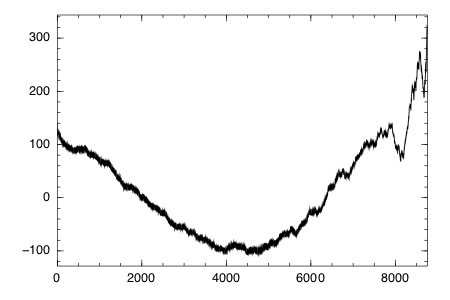

In [30]:
plot(convert(Vector{Float64}, _bins), station_ACF)
xlim(0,24*365)

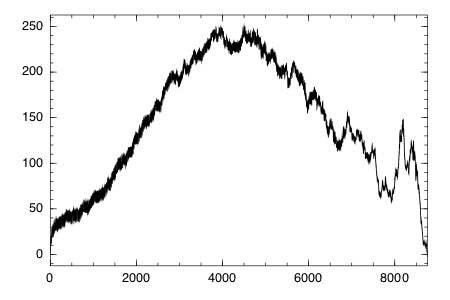

In [31]:
plot(convert(Vector{Float64}, _bins), station_variog)
xlim(0,24*365)

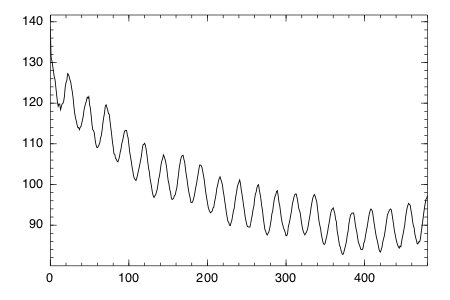

In [32]:
plot(convert(Vector{Float64}, _bins), station_ACF)
xlim(0,24*20)

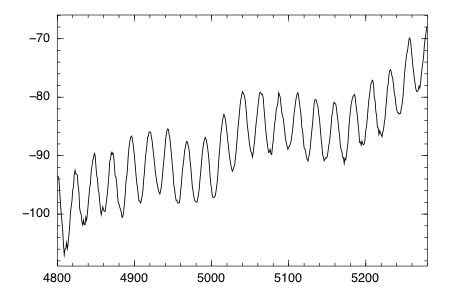

In [35]:
plot(convert(Vector{Float64}, _bins), station_ACF)
xlim(24*200,24*220)

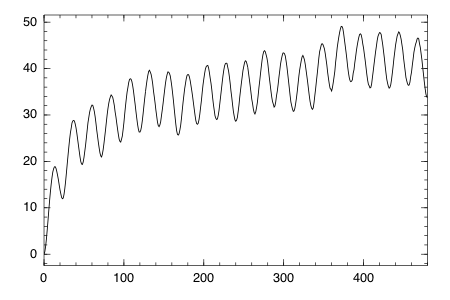

In [33]:
plot(convert(Vector{Float64}, _bins), station_variog)
xlim(0,24*20)